In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
portfolio = pd.read_json(r'C:\Desktop\portfolio.json', orient='records', lines=True)
profile = pd.read_json(r'C:\Desktop\profile.json', orient='records', lines=True)
transcript = pd.read_json(r'C:\Desktop\transcript.json', orient='records', lines=True)

In [3]:
df=pd.DataFrame(transcript['value'].values.tolist(),index=transcript.index)

In [4]:
transcript=transcript.merge(df,left_index=True, right_index=True)

In [5]:
#one hot encode channels
mlb = MultiLabelBinarizer()
channel = pd.DataFrame(mlb.fit_transform(portfolio['channels']),columns=mlb.classes_, index=portfolio.index)

In [6]:
portfolio=portfolio.merge(channel,left_index=True, right_index=True)

In [7]:
transcript=transcript.merge(portfolio, left_on='offer_id', right_on='id', how='left')

In [8]:
transcript=transcript.merge(profile, left_on='person', right_on='id', how='left')

In [9]:
transcript=transcript.merge(portfolio, left_on='offer id', right_on='id', how='left')

In [10]:
transcript_a=transcript[(transcript['event']=='offer completed') & (transcript['gender']!='O')]\
.groupby(['gender','offer_type_x','difficulty_x','reward_x','duration_x'])['event'].count()

In [11]:
transcript_a

gender  offer_type_x  difficulty_x  reward_x  duration_x
F       bogo          5.0           5.0       5.0           1899
                                              7.0           1999
                      10.0          10.0      5.0           1746
                                              7.0           1857
        discount      7.0           3.0       7.0           2206
                      10.0          2.0       7.0           1851
                                              10.0          2216
                      20.0          5.0       10.0          1703
M       bogo          5.0           5.0       5.0           2137
                                              7.0           2115
                      10.0          10.0      5.0           1519
                                              7.0           1741
        discount      7.0           3.0       7.0           2613
                      10.0          2.0       7.0           2000
                                 

In [12]:
transcript_b=transcript[(transcript['event']=='offer received') & (transcript['offer_type_y']!='informational')
& (transcript['gender']!='O')]\
.groupby(['gender','offer_type_y','difficulty_y','reward','duration_y'])['event'].count()
# I omit O because it's unclear what gender it is so would not inform future targeting strategy

In [13]:
transcript_b

gender  offer_type_y  difficulty_y  reward  duration_y
F       bogo          5.0           5.0     5.0           2721
                                            7.0           2767
                      10.0          10.0    5.0           2737
                                            7.0           2750
        discount      7.0           3.0     7.0           2718
                      10.0          2.0     7.0           2728
                                            10.0          2696
                      20.0          5.0     10.0          2801
M       bogo          5.0           5.0     5.0           3767
                                            7.0           3817
                      10.0          10.0    5.0           3784
                                            7.0           3840
        discount      7.0           3.0     7.0           3845
                      10.0          2.0     7.0           3815
                                            10.0          3868


In [14]:
reward_type_analysis=pd.DataFrame(round(transcript_a/transcript_b*100,1)).reset_index()

In [15]:
reward_type_analysis
reward_type_analysis.columns =['gender','offer_type','difficulty','reward','duration','Percent of Offers Completed/Offers Received']

In [16]:
reward_type_analysis['Offer Type Variant']=reward_type_analysis['offer_type'].str.upper()\
+": "+ "Spend: "+reward_type_analysis['difficulty'].astype(str)\
+", Reward: "+reward_type_analysis['reward'].astype(str)\
+", Duration: "+reward_type_analysis['duration'].astype(str)\
+", Gender: "+reward_type_analysis['gender'].astype(str)\
+", Rank: "

In [17]:
reward_type_analysis=reward_type_analysis.set_index('Offer Type Variant')
reward_type_analysis

,gender,offer_type,difficulty,reward,duration,Percent of Offers Completed/Offers Received
Offer Type Variant,,,,,,
"BOGO: Spend: 5.0, Reward: 5.0, Duration: 5.0, Gender: F, Rank:",F,bogo,5.0,5.0,5.0,69.8
"BOGO: Spend: 5.0, Reward: 5.0, Duration: 7.0, Gender: F, Rank:",F,bogo,5.0,5.0,7.0,72.2
"BOGO: Spend: 10.0, Reward: 10.0, Duration: 5.0, Gender: F, Rank:",F,bogo,10.0,10.0,5.0,63.8
"BOGO: Spend: 10.0, Reward: 10.0, Duration: 7.0, Gender: F, Rank:",F,bogo,10.0,10.0,7.0,67.5
"DISCOUNT: Spend: 7.0, Reward: 3.0, Duration: 7.0, Gender: F, Rank:",F,discount,7.0,3.0,7.0,81.2
"DISCOUNT: Spend: 10.0, Reward: 2.0, Duration: 7.0, Gender: F, Rank:",F,discount,10.0,2.0,7.0,67.9
"DISCOUNT: Spend: 10.0, Reward: 2.0, Duration: 10.0, Gender: F, Rank:",F,discount,10.0,2.0,10.0,82.2
"DISCOUNT: Spend: 20.0, Reward: 5.0, Duration: 10.0, Gender: F, Rank:",F,discount,20.0,5.0,10.0,60.8
"BOGO: Spend: 5.0, Reward: 5.0, Duration: 5.0, Gender: M, Rank:",M,bogo,5.0,5.0,5.0,56.7


In [18]:
rank=reward_type_analysis['Percent of Offers Completed/Offers Received'].rank(ascending=False).reset_index()\
.rename(columns={'Percent of Offers Completed/Offers Received':'Rank'})
rank=rank.sort_values(by='Rank',ascending=True).reset_index(drop=True)

In [19]:
reward_type_analysis=reward_type_analysis.reset_index()


In [20]:
reward_type_analysis=reward_type_analysis.sort_values\
(by='Percent of Offers Completed/Offers Received',ascending=False).reset_index(drop=True)

In [21]:
reward_type_analysis=pd.merge(reward_type_analysis, rank, left_index=True, right_index=True)

In [22]:
reward_type_analysis=reward_type_analysis.rename(columns={'Offer Type Variant_x':'Offer Type Variant'}).drop(columns=['Offer Type Variant_y'])

In [23]:
reward_type_analysis.Rank=reward_type_analysis.Rank.astype(int)

In [24]:
reward_type_analysis.Rank=reward_type_analysis.Rank.astype(str)

In [25]:
#Offer Type Variant Leaderboard dataset
reward_type_analysis

,Offer Type Variant,gender,offer_type,difficulty,reward,duration,Percent of Offers Completed/Offers Received,Rank
0,"DISCOUNT: Spend: 10.0, Reward: 2.0, Duration: ...",F,discount,10.0,2.0,10.0,82.2,1
1,"DISCOUNT: Spend: 7.0, Reward: 3.0, Duration: 7...",F,discount,7.0,3.0,7.0,81.2,2
2,"BOGO: Spend: 5.0, Reward: 5.0, Duration: 7.0, ...",F,bogo,5.0,5.0,7.0,72.2,3
3,"DISCOUNT: Spend: 10.0, Reward: 2.0, Duration: ...",M,discount,10.0,2.0,10.0,70.3,4
4,"BOGO: Spend: 5.0, Reward: 5.0, Duration: 5.0, ...",F,bogo,5.0,5.0,5.0,69.8,5
5,"DISCOUNT: Spend: 7.0, Reward: 3.0, Duration: 7...",M,discount,7.0,3.0,7.0,68.0,6
6,"DISCOUNT: Spend: 10.0, Reward: 2.0, Duration: ...",F,discount,10.0,2.0,7.0,67.9,7
7,"BOGO: Spend: 10.0, Reward: 10.0, Duration: 7.0...",F,bogo,10.0,10.0,7.0,67.5,8
8,"BOGO: Spend: 10.0, Reward: 10.0, Duration: 5.0...",F,bogo,10.0,10.0,5.0,63.8,9
9,"DISCOUNT: Spend: 20.0, Reward: 5.0, Duration: ...",F,discount,20.0,5.0,10.0,60.8,10


In [26]:
reward_type_analysis['Offer Type Variant']=reward_type_analysis['Offer Type Variant']+reward_type_analysis['Rank']

In [27]:
reward_type_analysis=reward_type_analysis.set_index('Offer Type Variant')

In [28]:
reward_type_analysis=reward_type_analysis.sort_values\
(by='Percent of Offers Completed/Offers Received')

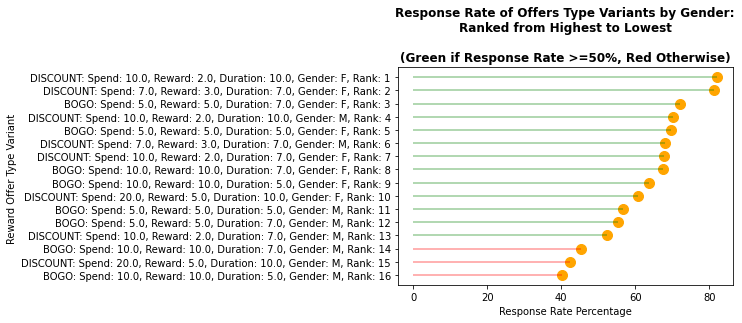

In [29]:
#CREATE POC OF OFFER TYPE VARIANT RANKING LEADERBOARD 
# Reorder it so it would show highest to lowest horizontally:
ordered_df = reward_type_analysis.sort_values(by='Percent of Offers Completed/Offers Received')
my_range=range(1,len(reward_type_analysis.index)+1)


my_color=np.where(reward_type_analysis['Percent of Offers Completed/Offers Received']<50, 'red', 'green')

plt.hlines(y=my_range, xmin=0, 
           xmax=reward_type_analysis['Percent of Offers Completed/Offers Received'], 
           color=my_color, alpha=0.4)
plt.scatter(reward_type_analysis['Percent of Offers Completed/Offers Received'], my_range, alpha=1, color=['orange'], s=100)
 
# Add title and axis names
plt.yticks(my_range, reward_type_analysis.index)
plt.title("Response Rate of Offers Type Variants by Gender:\nRanked from Highest to Lowest\n \n(Green if Response Rate >=50%, Red Otherwise)",weight='bold')
plt.xlabel('Response Rate Percentage')
plt.ylabel('Reward Offer Type Variant ')
plt.show()